# SISO System Identification for Ground Motion Events

In [1]:
import numpy as np
from utilities.printing import *
import ssid
from ssid import modal, spec
from utilities.config import Config

## Upload a Dataset and Identify Spectral Quantities

In [2]:
inputs = np.loadtxt("./uploads/opensees_sdof/Accgrd_set1.csv", delimiter=",")
outputs = np.loadtxt("./uploads/opensees_sdof/Accrsp_set1.csv", delimiter=",")
# inputs = np.loadtxt("./uploads/opensees_sdof/Accgrd_set2.csv", delimiter=",")
# outputs = np.loadtxt("./uploads/opensees_sdof/Accrsp_set2.csv", delimiter=",")
t = inputs[0,:]
dt = t[1] - t[0]

### Method Inputs

See [`01_SISO_Intro`](01_SISO_Intro) for parameter definitions

In [3]:
# Set parameters
conf = Config()
conf.m  = 300
conf.no = 140
conf.nc = 140
conf.r  =   2
conf.a  =   0
conf.b  =   0
conf.l  =  10
conf.g  =   3
conf.damping = 0.0001
conf.period_band = (0.1, 3.0)

### Perform System Identification

100%|█████████▉| 8060/8061 [00:00<00:00, 28671.12it/s]
/mnt/c/Users/16507/Documents/GitHub/SystemIdentification/src/ssid/spec.py:17: RuntimeWarning: divide by zero encountered in true_divide
  return (1/input_transform[0], output_transform[1]/input_transform[1])
100%|█████████▉| 8060/8061 [00:00<00:00, 35468.57it/s]


   period(s)  damping
 [[0.41080027 0.02340861]
 [0.41080028 0.02340847]
 [0.41080027 0.02340856]
 [0.41080019 0.02340856]
 [0.41080029 0.02340851]
 [0.41080029 0.02340858]
 [0.41080021 0.0234084 ]
 [0.41080027 0.02340857]
 [0.41080023 0.02340843]
 [0.41080023 0.02340838]
 [0.41080029 0.02340854]]


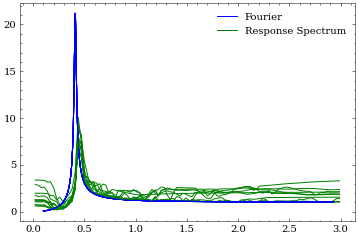

In [4]:
mode_predictions = np.empty((inputs.shape[0]-1, 2))

for i,motion in enumerate(inputs[1:,:]):
    A,B,C,D = ssid.system(method="srim", inputs=motion, outputs=outputs[i+1,:], **conf)
    ss_modes = modal.system_modes((A,B,C,D),dt)
    mode_predictions[i,:] = [[1/v["freq"], v["damp"]] for v in ss_modes.values()][0]  # save predicted period and damping
    periods, amplitudes = spec.fourier_transfer(inputs=motion, outputs=outputs[i+1,:], step=dt, **conf)
    plt.plot(periods, amplitudes, color="blue", label=["Fourier" if i==0 else None][0])
    periods, amplitudes = spec.response_transfer(inputs=motion, outputs=outputs[i+1,:], step=dt, **conf)
    plt.plot(periods, amplitudes, color="green", label=["Response Spectrum" if i==0 else None][0])
plt.legend()
np.savetxt("output/set1_srim.csv", mode_predictions)
print("   period(s)  damping\n", mode_predictions)